In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import random

In [ ]:
''' Reads the and define the training and cross validation set '''
df = pd.read_csv("/content/drive/MyDrive/Project(WOC)/linear_train.csv" )
Y_train = np.array(df.iloc[0:45000,21:22],dtype='float32')
X_train= np.array(df.iloc[0:45000,1:21],dtype = 'float32')
Y_CVS = np.array(df.iloc[0:5000,21:22],dtype='float32')
X_CVS= np.array(df.iloc[0:5000,1:21],dtype = 'float32')
Y_train = Y_train.reshape(-1,1)

In [ ]:
Y_train.shape

(45000, 1)

In [ ]:
J = []
iterations= []

In [ ]:
''' Reads the and define the test set '''
df1 = pd.read_csv("/content/drive/MyDrive/Project(WOC)/linear_test_data.csv" )
X_test = np.array(df1.iloc[0:20000,1:21])

In [ ]:
class Linear_Regression:
    def __init__(self,X,Y,learning_rate,epoches):
        self.w = np.zeros((1,X.shape[1]))
        self.b =  random.randint(0,100)
        self.Train(X,Y,learning_rate,epoches)
    def Normalization(self,X):
      #z-score normalization
      self.mu = np.mean(X,axis = 0)
      self.sigma= np.std(X,axis =0)
      X_norm = (X-self.mu)/self.sigma
      return X_norm
    def gradient(self,X,Y):
        m = X.shape[0]#number of training examples 
        n = X.shape[1]#number of features 
        dj_dw = np.zeros((1,n))
        dj_db = 0
        dj_db = np.sum((np.dot(self.w,X.transpose()) + self.b - Y.reshape(1,-1)),axis =1)
        dj_db /= m
        dj_dw = np.dot((np.dot(self.w,X.transpose())+self.b-Y.reshape(1,-1)),X)
        dj_dw /= m
        return dj_dw,dj_db
    def Train(self,X,Y,learning_rate,epoches):
        X_norm = self.Normalization(X)
        self.Gradientdescent(X_norm,Y,learning_rate,epoches)
    def Gradientdescent(self,X,Y,learning_rate,epoches):
      t = 0
      for j in range (0,epoches):
        t= t+1
        if j%50==0:
          print(f"Cost function at {j} th iteration is :-  {self.cost_function(X,Y)}")
          J.append(self.cost_function(X,Y))
          iterations.append(j)
        dj_dw,dj_db = self.gradient(X,Y)
        self.w -=(learning_rate)*dj_dw
        self.b -=  (learning_rate)*dj_db
      print(self.w)
      print(self.b)
    def cost_function(self,X,Y):
      z = (np.dot(self.w,X.transpose())).reshape(1,X.shape[0])
      z -= Y.reshape(1,-1)
      z += self.b
      z = z**2
      z /= 2*X.shape[0]
      return np.sum(z,axis = 1)
    def evaluate(self,X_test_data):
      '''Note i have defined attributes of mu and sigma in the class because we need to same sigma(standard deviation) 
      and mu(mean) as the of training data to get correct results'''
      X_test_data_norm= (X_test_data-self.mu)/self.sigma
      Y= (np.dot(self.w,X_test_data_norm.transpose()) + self.b)
      return Y
    def CVS(self,X_check,Y_check):
      Y_pred = self.evaluate(X_check)
      return (1 - (np.sum((Y_check.reshape(1,-1) - Y_pred)**2,axis = 1))/(np.sum((Y_check.reshape(1,-1) - np.mean(Y_check.reshape(1,-1),axis = 1))**2,axis = 1)))*100 

In [ ]:
 l = Linear_Regression(X_train,Y_train,0.6,1800)

Cost function at 0 th iteration is :-  [30714.92360365]
Cost function at 50 th iteration is :-  [4779.97042004]
Cost function at 100 th iteration is :-  [4779.97042004]
Cost function at 150 th iteration is :-  [4779.97042004]
Cost function at 200 th iteration is :-  [4779.97042004]
Cost function at 250 th iteration is :-  [4779.97042004]
Cost function at 300 th iteration is :-  [4779.97042004]
Cost function at 350 th iteration is :-  [4779.97042004]
Cost function at 400 th iteration is :-  [4779.97042004]
Cost function at 450 th iteration is :-  [4779.97042004]
Cost function at 500 th iteration is :-  [4779.97042004]
Cost function at 550 th iteration is :-  [4779.97042004]
Cost function at 600 th iteration is :-  [4779.97042004]
Cost function at 650 th iteration is :-  [4779.97042004]
Cost function at 700 th iteration is :-  [4779.97042004]
Cost function at 750 th iteration is :-  [4779.97042004]
Cost function at 800 th iteration is :-  [4779.97042004]
Cost function at 850 th iteration

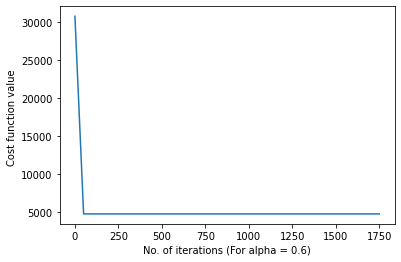

In [ ]:
plt.xlabel("No. of iterations (For alpha = 0.6)")
plt.ylabel("Cost function value ")
plt.plot(iterations,J)
plt.show()

In [ ]:
print(l.CVS(X_CVS,Y_CVS))

[84.43047602]


In [ ]:
output = l.evaluate(X_test)

In [ ]:
df1["output label"]=output.transpose()
a = np.array(df1.columns)
df2 = df1.drop(a[1:-1],axis = 1 )
df2
df2.to_csv('/content/drive/MyDrive/Project(WOC)/linear_regression_output(1).csv')